### Import the Libraries

In [1]:
import pandas as pd
import numpy as np
import statistics as stats
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Read the Data

In [2]:
df=pd.read_csv(r'E:\DATASETS\Copper_Set.csv')

### View Top 5 Records

In [3]:
df.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00


### Shape of the Dataset

In [4]:
df.shape

(181673, 14)

In [5]:
df=df.drop(columns=df[['id','material_ref']])

In [6]:
df.head()

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price
0,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,1670798778,20210701.0,854.00
1,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,1668701718,20210401.0,1047.00
2,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,628377,20210101.0,644.33
3,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,1668701718,20210101.0,768.00
4,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,640665,20210301.0,577.00


### Check null Value

In [7]:
df.isnull().sum()

item_date         1
quantity tons     0
customer          1
country          28
status            2
item type         0
application      24
thickness         1
width             0
product_ref       0
delivery date     1
selling_price     1
dtype: int64

In [8]:
df=df.dropna()

In [9]:
df.isnull().sum()

item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
product_ref      0
delivery date    0
selling_price    0
dtype: int64

In [10]:
df.shape

(181638, 12)

### Check Duplicate Values

In [11]:
df.duplicated().sum()

0

### EDA - Exploratory Data Analysis

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181638 entries, 0 to 181672
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   item_date      181638 non-null  float64
 1   quantity tons  181638 non-null  object 
 2   customer       181638 non-null  float64
 3   country        181638 non-null  float64
 4   status         181638 non-null  object 
 5   item type      181638 non-null  object 
 6   application    181638 non-null  float64
 7   thickness      181638 non-null  float64
 8   width          181638 non-null  float64
 9   product_ref    181638 non-null  int64  
 10  delivery date  181638 non-null  float64
 11  selling_price  181638 non-null  float64
dtypes: float64(8), int64(1), object(3)
memory usage: 18.0+ MB


In [13]:
# quantity tons data type is float. 
# change the data type obj to float

df['quantity tons']=df['quantity tons'].replace('e',np.nan)
df['quantity tons']=df['quantity tons'].astype('float')
print('Median :',df['quantity tons'].median())
df['quantity tons']=df['quantity tons'].fillna(30.36395321)

Median : 30.36257954


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181638 entries, 0 to 181672
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   item_date      181638 non-null  float64
 1   quantity tons  181638 non-null  float64
 2   customer       181638 non-null  float64
 3   country        181638 non-null  float64
 4   status         181638 non-null  object 
 5   item type      181638 non-null  object 
 6   application    181638 non-null  float64
 7   thickness      181638 non-null  float64
 8   width          181638 non-null  float64
 9   product_ref    181638 non-null  int64  
 10  delivery date  181638 non-null  float64
 11  selling_price  181638 non-null  float64
dtypes: float64(9), int64(1), object(2)
memory usage: 18.0+ MB


In [15]:
df.isnull().sum()

item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
product_ref      0
delivery date    0
selling_price    0
dtype: int64

In [16]:
df.describe()

,item_date,quantity tons,customer,country,application,thickness,width,product_ref,delivery date,selling_price
count,1.816380e+05,1.816380e+05,1.816380e+05,181638.000000,181638.000000,181638.000000,181638.000000,1.816380e+05,1.816380e+05,1.816380e+05
mean,2.020459e+07,5.876006e+03,3.023251e+07,44.893079,25.616286,2.564151,1295.262682,4.740325e+08,2.020738e+07,1.918328e+03
std,4.551294e+03,2.349301e+06,1.005615e+05,24.404245,17.754183,6.572518,261.642520,7.175384e+08,2.411281e+04,3.318267e+05
min,1.995000e+07,-2.000000e+03,1.245800e+04,25.000000,2.000000,0.180000,1.000000,6.117280e+05,2.019040e+07,-1.160000e+03
25%,2.020093e+07,1.096868e+01,3.019688e+07,26.000000,10.000000,0.700000,1180.000000,6.119930e+05,2.020110e+07,6.690000e+02
50%,2.020113e+07,3.036327e+01,3.020524e+07,30.000000,15.000000,1.500000,1250.000000,6.406650e+05,2.021010e+07,8.120000e+02
75%,2.021020e+07,6.716141e+01,3.028042e+07,78.000000,41.000000,3.000000,1500.000000,1.332077e+09,2.021040e+07,9.530000e+02
max,2.021040e+07,1.000000e+09,3.040818e+07,113.000000,99.000000,2500.000000,2990.000000,1.722208e+09,3.031010e+07,1.000010e+08


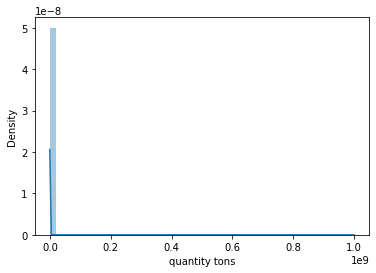

Skewness : 424.64990532133237


In [459]:
# 1. Quantity Tons
# Check the skewness of quantity tons feature

sns.distplot(df['quantity tons'])
plt.show()
print('Skewness :',df['quantity tons'].skew())

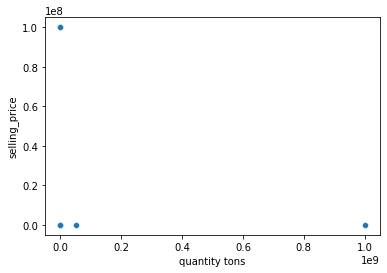

In [460]:
sns.scatterplot(df['quantity tons'],df['selling_price'])
plt.show()

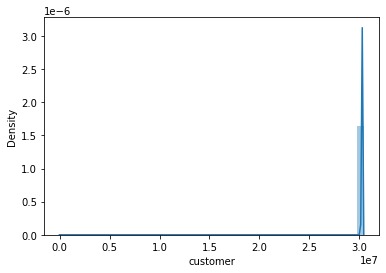

Skewness : -149.08849775548512


In [461]:
# 2. Customer
# Check the skewness of Customer feature

sns.distplot(df['customer'])
plt.show()
print('Skewness :',df['customer'].skew())

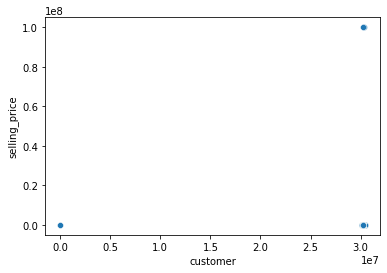

In [462]:
sns.scatterplot(df['customer'],df['selling_price'])
plt.show()

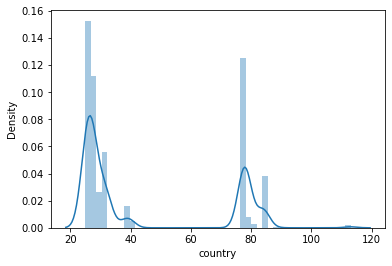

Skewness : 0.7535909197330176


In [463]:
# 3. Country
# Check the skewness of Country feature

sns.distplot(df['country'])
plt.show()
print('Skewness :',df['country'].skew())

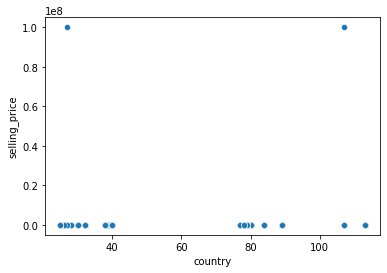

In [464]:
sns.scatterplot(df['country'],df['selling_price'])
plt.show()

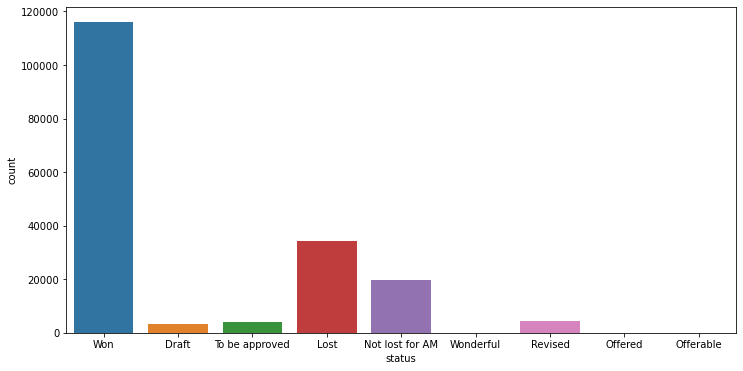

In [465]:
# 4. Status
plt.figure(figsize=(12,6))
sns.countplot(df['status'])
plt.show()

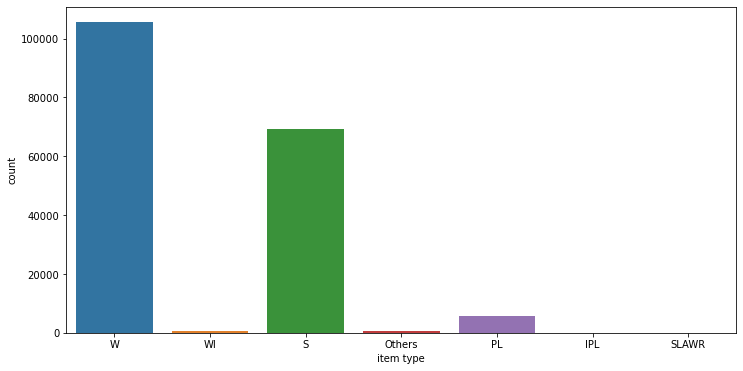

In [466]:
# 5. Item Type
plt.figure(figsize=(12,6))
sns.countplot(df['item type'])
plt.show()

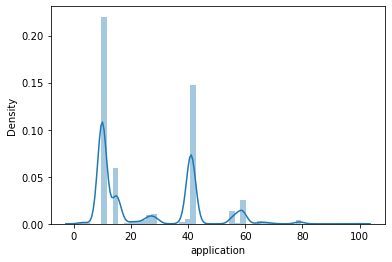

Skewness : 0.7243122177332125


In [467]:
# 6. Application
# Check the skewness of Application feature

sns.distplot(df['application'])
plt.show()
print('Skewness :',df['application'].skew())

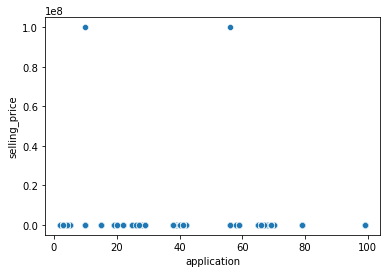

In [468]:
sns.scatterplot(df['application'],df['selling_price'])
plt.show()

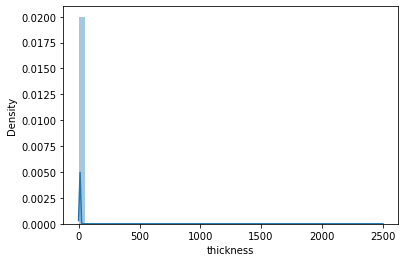

Skewness : 303.4764461273453


In [469]:
# 7. Thickness
# Check the skewness of Thickness feature

sns.distplot(df['thickness'])
plt.show()
print('Skewness :',df['thickness'].skew())

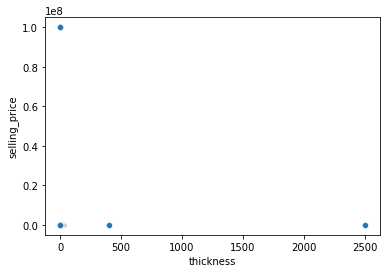

In [470]:
sns.scatterplot(df['thickness'],df['selling_price'])
plt.show()

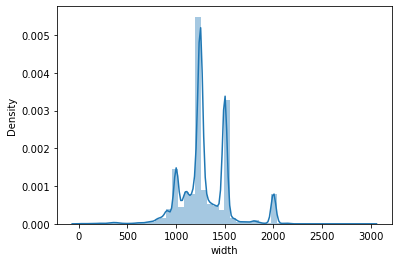

Skewness : 0.374863127815038


In [471]:
# 7. Width
# Check the skewness of Width feature

sns.distplot(df['width'])
plt.show()
print('Skewness :',df['width'].skew())

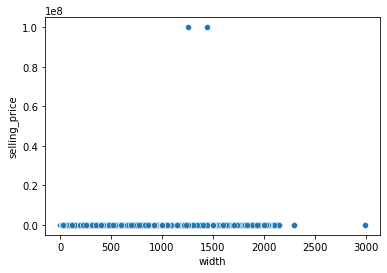

In [472]:
sns.scatterplot(df['width'],df['selling_price'])
plt.show()

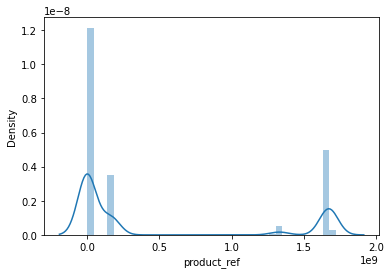

Skewness : 1.0150099676994326


In [473]:
# 8. Product Reference
# Check the skewness of Product Reference feature

sns.distplot(df['product_ref'])
plt.show()
print('Skewness :',df['product_ref'].skew())

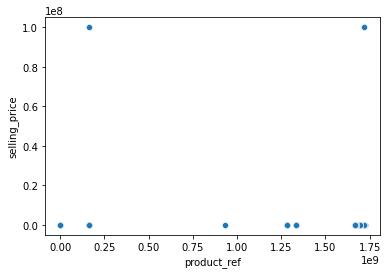

In [474]:
sns.scatterplot(df['product_ref'],df['selling_price'])
plt.show()

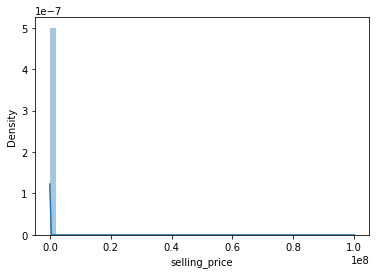

In [475]:
sns.distplot(df['selling_price'])
plt.show()

In [17]:
df['item_date']=df['item_date'].astype('str')
df['delivery date']=df['delivery date'].astype('str')

In [18]:
df['item_date_year']=df['item_date'].apply(lambda x:int(x[:4]))
df['item_date_month']=df['item_date'].apply(lambda x: int(x[4:6]))
df['delivery_date_year']=df['delivery date'].apply(lambda x:int(x[:4]))
df['delivery_date_month']=df['delivery date'].apply(lambda x:int(x[4:6]))

In [19]:
df['overall_month']=np.abs(df['item_date_month']-df['delivery_date_month'])
df['overall_year']=np.abs(df['item_date_year']-df['delivery_date_year'])

In [20]:
df.drop(columns=['item_date','delivery date','item_date_month','delivery_date_month','delivery_date_year','item_date_year'],inplace=True)

In [21]:
df.head()

,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,selling_price,overall_month,overall_year
0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,1670798778,854.00,3,0
1,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,1668701718,1047.00,0,0
2,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,628377,644.33,3,0
3,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,1668701718,768.00,3,0
4,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,640665,577.00,1,0


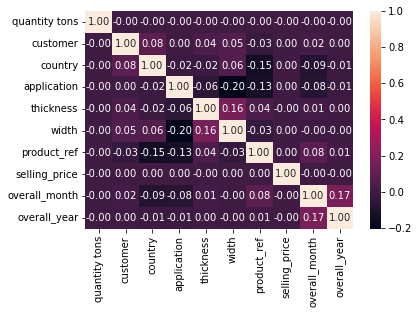

In [22]:
sns.heatmap(df.corr(),annot=True,fmt=".2f")
plt.show()

### Treat the Outliers

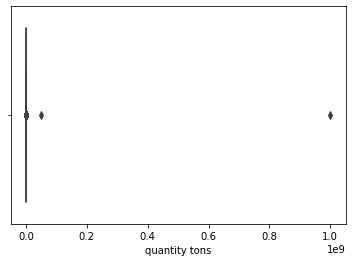

In [23]:
sns.boxplot(df['quantity tons'])
plt.show()

In [24]:
# quantity tons
df['quantity tons']=df['quantity tons'].fillna(3.413260820573159)
qrt1=np.quantile(df['quantity tons'],q=0.25)
median=df['quantity tons'].median()
qrt3=np.quantile(df['quantity tons'],q=0.75)
iqr=qrt3-qrt1
lowb=qrt1-1.5*iqr
uppb=qrt3+1.5*iqr
print('Quartile 1 :',qrt1)
print('Median     :',median)
print('Quartile 3 :',qrt3)
print('Lowerbound :',lowb)
print('Upperbound :',uppb)

Quartile 1 : 10.968678409999999
Median     : 30.363266375
Quartile 3 : 67.161414615
Lowerbound : -73.3204258975
Upperbound : 151.4505189225


In [25]:
outliers=[]
for i in df['quantity tons']:
    if i<lowb:
        outliers.append(lowb)
    elif i>uppb:
        outliers.append(uppb)
    else:
        outliers.append(i)
df['quantity tons']=outliers

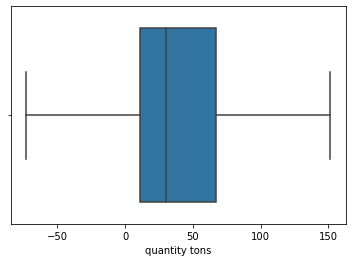

In [26]:
sns.boxplot(df['quantity tons'])
plt.show()

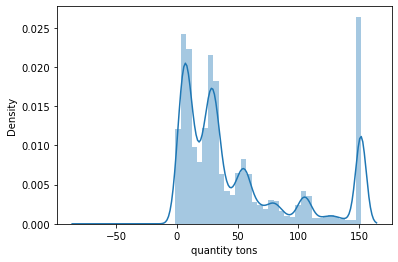

Skewness : 1.1216567758562528


In [27]:
sns.distplot(df['quantity tons'])
plt.show()
print('Skewness :',df['quantity tons'].skew())

<AxesSubplot:xlabel='customer'>

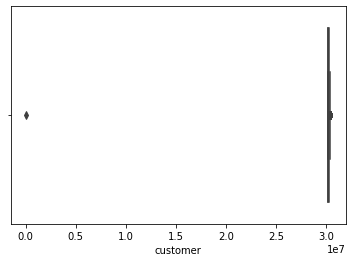

In [28]:
# customer
sns.boxplot(df['customer'])

In [29]:
qrt1=np.quantile(df['customer'],q=0.25)
median=df['customer'].median()
qrt3=np.quantile(df['customer'],q=0.75)
iqr=qrt3-qrt1
lowb=qrt1-1.5*iqr
uppb=qrt3+1.5*iqr
print('Quartile 1 :',qrt1)
print('Median     :',median)
print('Quartile 3 :',qrt3)
print('Lowerbound :',lowb)
print('Upperbound :',uppb)
outliers=[]
for i in df['customer']:
    if i<lowb:
        outliers.append(lowb)
    elif i>uppb:
        outliers.append(uppb)
    else:
        outliers.append(i)
df['customer']=outliers

Quartile 1 : 30196884.0
Median     : 30205242.0
Quartile 3 : 30280416.0
Lowerbound : 30071586.0
Upperbound : 30405714.0


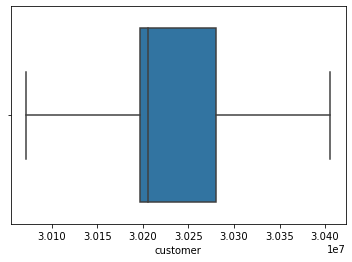

In [30]:
sns.boxplot(df['customer'])
plt.show()

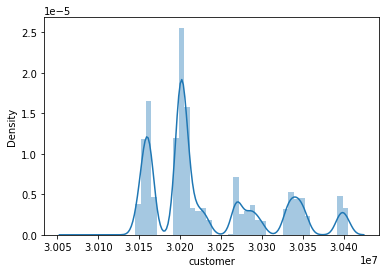

Skewness : 0.9047427587165121


In [31]:
sns.distplot(df['customer'])
plt.show()
print('Skewness :',df['customer'].skew())

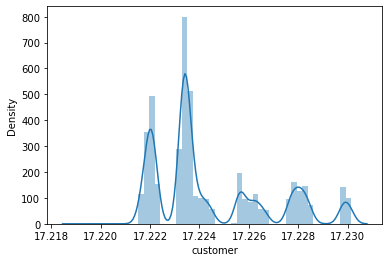

Skewness : 0.9016673535353062


In [32]:
df['customer']=np.log(df['customer'])
sns.distplot(df['customer'])
plt.show()
print('Skewness :',df['customer'].skew())

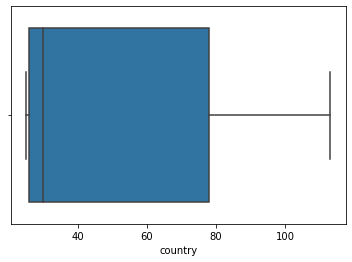

In [33]:
# country

sns.boxplot(df['country'])
plt.show()

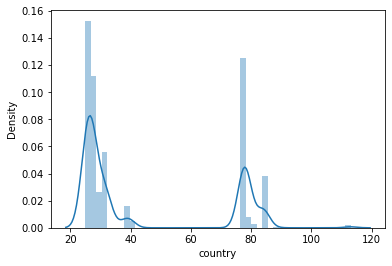

Skewness : 0.7535909197330176


In [34]:
sns.distplot(df['country'])
plt.show()
print('Skewness :',df['country'].skew())

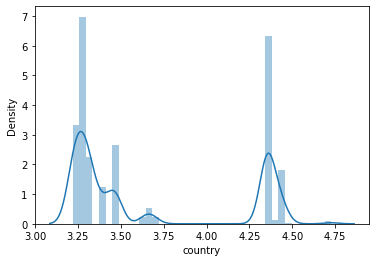

Skewness : 0.6590225770371265


In [35]:
df['country']=np.log(df['country'])
sns.distplot(df['country'])
plt.show()
print('Skewness :',df['country'].skew())

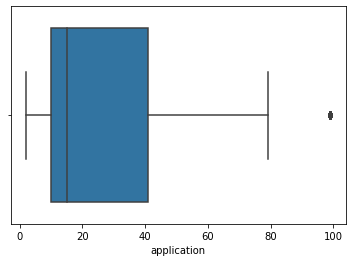

In [36]:
# application

sns.boxplot(df['application'])
plt.show()

In [37]:
qrt1=np.quantile(df['application'],q=0.25)
median=df['application'].median()
qrt3=np.quantile(df['application'],q=0.75)
iqr=qrt3-qrt1
lowb=qrt1-1.5*iqr
uppb=qrt3+1.5*iqr
print('Quartile 1 :',qrt1)
print('Median     :',median)
print('Quartile 3 :',qrt3)
print('Lowerbound :',lowb)
print('Upperbound :',uppb)
outliers=[]
for i in df['application']:
    if i<lowb:
        outliers.append(lowb)
    elif i>uppb:
        outliers.append(uppb)
    else:
        outliers.append(i)
df['application']=outliers

Quartile 1 : 10.0
Median     : 15.0
Quartile 3 : 41.0
Lowerbound : -36.5
Upperbound : 87.5


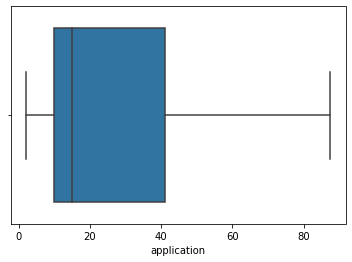

In [38]:
sns.boxplot(df['application'])
plt.show()

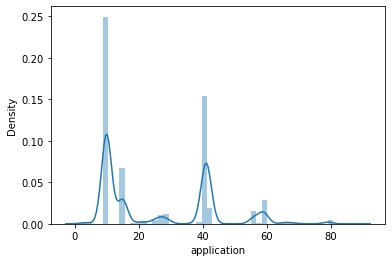

Skewness : 0.7073511951360936


In [39]:
sns.distplot(df['application'])
plt.show()
print('Skewness :',df['application'].skew())

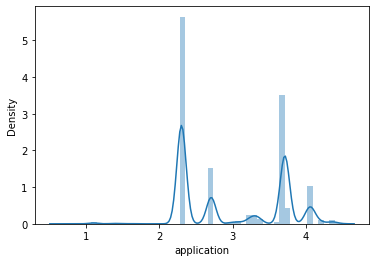

Skewness : 0.1938105793424309


In [40]:
df['application']=np.log(df['application'])
sns.distplot(df['application'])
plt.show()
print('Skewness :',df['application'].skew())

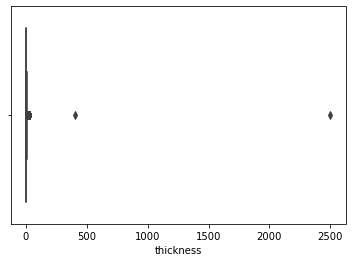

In [41]:
# thickness

sns.boxplot(df['thickness'])
plt.show()

In [42]:
qrt1=np.quantile(df['thickness'],q=0.25)
median=df['thickness'].median()
qrt3=np.quantile(df['thickness'],q=0.75)
iqr=qrt3-qrt1
lowb=qrt1-1.5*iqr
uppb=qrt3+1.5*iqr
print('Quartile 1 :',qrt1)
print('Median     :',median)
print('Quartile 3 :',qrt3)
print('Lowerbound :',lowb)
print('Upperbound :',uppb)
outliers=[]
for i in df['thickness']:
    if i<lowb:
        outliers.append(lowb)
    elif i>uppb:
        outliers.append(uppb)
    else:
        outliers.append(i)
df['thickness']=outliers

Quartile 1 : 0.7
Median     : 1.5
Quartile 3 : 3.0
Lowerbound : -2.75
Upperbound : 6.449999999999999


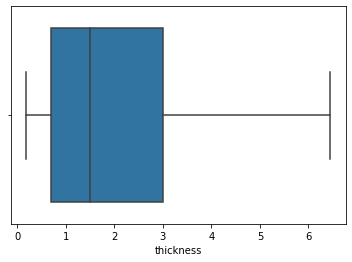

In [43]:
sns.boxplot(df['thickness'])
plt.show()

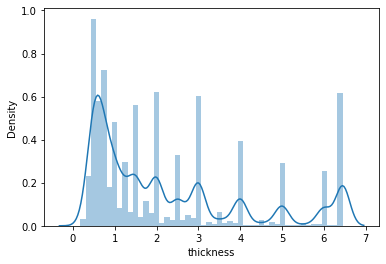

Skewness : 1.0613762337146269


In [44]:
sns.distplot(df['thickness'])
plt.show()
print('Skewness :',df['thickness'].skew())

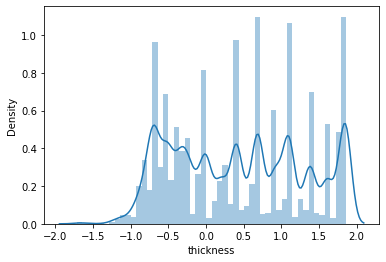

Skewness : 0.1011168748412259


In [45]:
df['thickness']=np.log(df['thickness'])
sns.distplot(df['thickness'])
plt.show()
print('Skewness :',df['thickness'].skew())

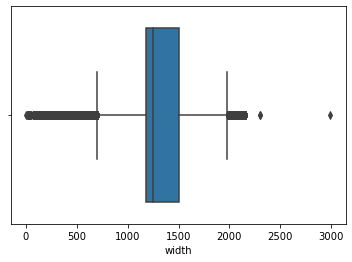

In [46]:
# width

sns.boxplot(df['width'])
plt.show()

In [47]:
qrt1=np.quantile(df['width'],q=0.25)
median=df['width'].median()
qrt3=np.quantile(df['width'],q=0.75)
iqr=qrt3-qrt1
lowb=qrt1-1.5*iqr
uppb=qrt3+1.5*iqr
print('Quartile 1 :',qrt1)
print('Median     :',median)
print('Quartile 3 :',qrt3)
print('Lowerbound :',lowb)
print('Upperbound :',uppb)
outliers=[]
for i in df['width']:
    if i<lowb:
        outliers.append(lowb)
    elif i>uppb:
        outliers.append(uppb)
    else:
        outliers.append(i)
df['width']=outliers

Quartile 1 : 1180.0
Median     : 1250.0
Quartile 3 : 1500.0
Lowerbound : 700.0
Upperbound : 1980.0


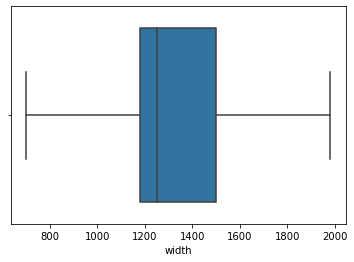

In [48]:
sns.boxplot(df['width'])
plt.show()

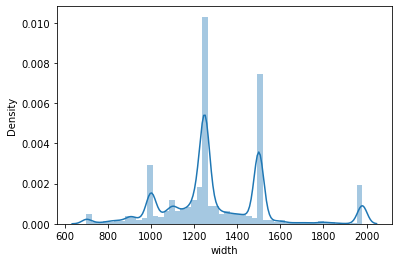

Skewness : 0.6679623562773281


In [49]:
sns.distplot(df['width'])
plt.show()
print('Skewness :',df['width'].skew())

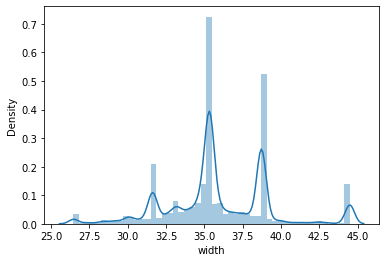

Skewness : 0.2767617664125403


In [50]:
df['width']=np.sqrt(df['width'])
sns.distplot(df['width'])
plt.show()
print('Skewness :',df['width'].skew())

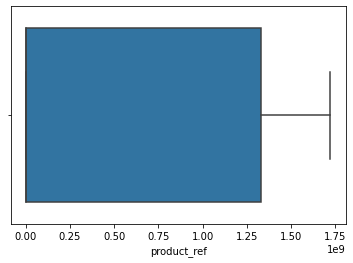

In [51]:
# product_ref

sns.boxplot(df['product_ref'])
plt.show()

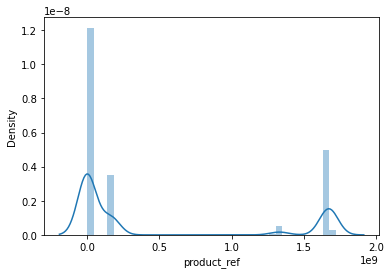

Skewness : 1.0150099676994326


In [52]:
sns.distplot(df['product_ref'])
plt.show()
print('Skewness :',df['product_ref'].skew())

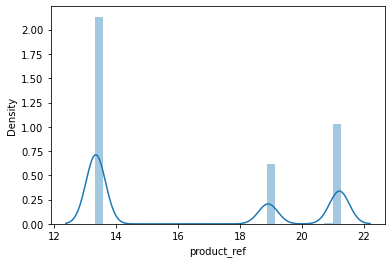

Skewness : 0.3806094273884239


In [53]:
df['product_ref']=np.log(df['product_ref'])
sns.distplot(df['product_ref'])
plt.show()
print('Skewness :',df['product_ref'].skew())

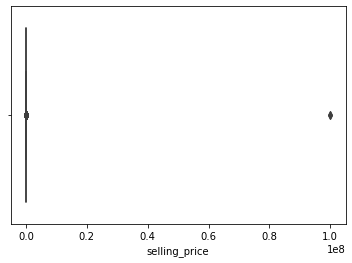

In [54]:
# selling price
sns.boxplot(df['selling_price'])
plt.show()

In [55]:
qrt1=np.quantile(df['selling_price'],q=0.25)
median=df['selling_price'].median()
qrt3=np.quantile(df['selling_price'],q=0.75)
iqr=qrt3-qrt1
lowb=qrt1-1.5*iqr
uppb=qrt3+1.5*iqr
print('Quartile 1 :',qrt1)
print('Median     :',median)
print('Quartile 3 :',qrt3)
print('Lowerbound :',lowb)
print('Upperbound :',uppb)
outliers=[]
for i in df['selling_price']:
    if i<lowb:
        outliers.append(lowb)
    elif i>uppb:
        outliers.append(uppb)
    else:
        outliers.append(i)
df['selling_price']=outliers

Quartile 1 : 669.0
Median     : 812.0
Quartile 3 : 953.0
Lowerbound : 243.0
Upperbound : 1379.0


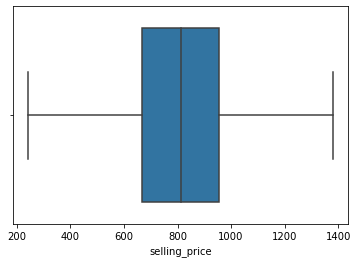

In [56]:
sns.boxplot(df['selling_price'])
plt.show()

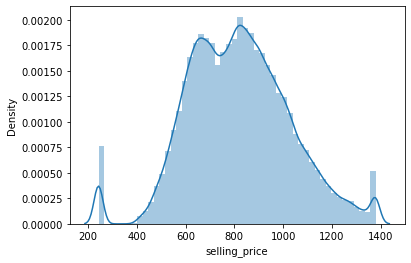

Skewness : 0.1379918523197989


In [57]:
sns.distplot(df['selling_price'])
plt.show()
print('Skewness :',df['selling_price'].skew())

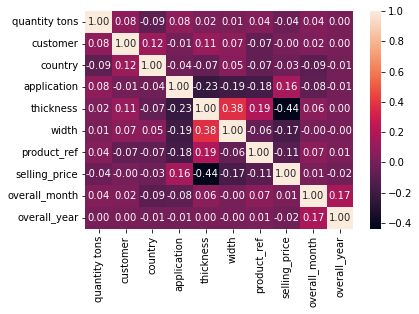

In [58]:
sns.heatmap(df.corr(),annot=True,fmt=".2f")
plt.show()

### Encoding the Data

In [59]:
df=df[(df['status']=='Won') | (df['status']=='Lost')]

In [60]:
# Status
df['status']=df['status'].map({'Won':1,'Lost':0})
# Item Type
df['item type']=df['item type'].map({'W':0,'WI':1,'S':2,'Others':3,'PL':4,'IPL':5,'SLAWR':6})

In [61]:
df.head()

,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,selling_price,overall_month,overall_year
0,54.151139,17.221905,3.332205,1,0,2.302585,0.693147,38.729833,21.236568,854.00,3,0
1,151.450519,17.223450,3.218876,1,0,3.713572,-0.223144,34.785054,21.235312,1047.00,0,0
2,151.450519,17.221827,3.401197,1,1,3.332205,-0.967584,30.854497,13.350896,644.33,3,0
3,151.450519,17.228293,3.465736,1,2,4.077537,0.832909,36.290495,21.235312,768.00,3,0
4,151.450519,17.223735,3.332205,1,0,2.302585,1.386294,44.497191,13.370262,577.00,1,0


### Split the Data

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [63]:
x=df[['quantity tons','customer','country','status','item type','application','thickness','width','product_ref','overall_month','overall_year']]
y=df['selling_price']

In [64]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

### Scaling

In [65]:
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

### Model Creation

### Regression Problem

In [66]:
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor,KNeighborsClassifier
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,ExtraTreesRegressor,ExtraTreesClassifier
from xgboost import XGBRegressor,XGBClassifier
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,precision_score,recall_score,precision_score,recall_score,f1_score,accuracy_score
from sklearn.model_selection import cross_val_score,RandomizedSearchCV

In [67]:
# Linear Regression 

lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
print('R2 Score :',r2_score(y_test,y_pred))
print('MSE :',mean_squared_error(y_test,y_pred))
print('MAE :',mean_absolute_error(y_test,y_pred))


R2 Score : 0.3959044823537021
MSE : 22904.524775929192
MAE : 122.18060645846067


In [68]:
# DT 

dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)
print('R2 Score :',r2_score(y_test,y_pred))
print('MSE :',mean_squared_error(y_test,y_pred))
print('MAE :',mean_absolute_error(y_test,y_pred))

R2 Score : 0.7838524228526417
MSE : 8195.32241410776
MAE : 51.14494877368026


In [528]:
# KNN 

knn=KNeighborsRegressor(n_neighbors=5)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
print('R2 Score :',r2_score(y_test,y_pred))
print('MSE :',mean_squared_error(y_test,y_pred))
print('MAE :',mean_absolute_error(y_test,y_pred))

R2 Score : 0.7339452513137741
MSE : 10068.898335435699
MAE : 68.26213103784455


In [69]:
# Random Forest 

rf=RandomForestRegressor()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
print('R2 Score :',r2_score(y_test,y_pred))
print('MSE :',mean_squared_error(y_test,y_pred))
print('MAE :',mean_absolute_error(y_test,y_pred))

R2 Score : 0.8708967908208397
MSE : 4895.000156295511
MAE : 43.67622741331492


In [530]:
# Gradient Boost 

gb=GradientBoostingRegressor(n_estimators=150)
gb.fit(x_train,y_train)
y_pred=gb.predict(x_test)
print('R2 Score :',r2_score(y_test,y_pred))
print('MSE :',mean_squared_error(y_test,y_pred))
print('MAE :',mean_absolute_error(y_test,y_pred))

R2 Score : 0.7232042517173627
MSE : 10475.393740953792
MAE : 78.06282267958989


In [531]:
# XGBoost 

xbg=XGBRegressor()
xbg.fit(x_train,y_train)
y_pred=xbg.predict(x_test)
print('R2 Score :',r2_score(y_test,y_pred))
print('MSE :',mean_squared_error(y_test,y_pred))
print('MAE :',mean_absolute_error(y_test,y_pred))

R2 Score : 0.8320764236880855
MSE : 6355.103324998389
MAE : 57.66507808304949


In [532]:
# Extra Tree

extra_tree_model = ExtraTreesRegressor(n_estimators = 100,
          criterion ='squared_error', max_features = "auto")
extra_tree_model.fit(x_train,y_train)
y_pred=extra_tree_model.predict(x_test)
print('R2 Score :',r2_score(y_test,y_pred))
print('MSE :',mean_squared_error(y_test,y_pred))
print('MAE :',mean_absolute_error(y_test,y_pred))

R2 Score : 0.8558752024312841
MSE : 5454.433501001369
MAE : 44.32276455193777


### Hyper Prameter Tuning

In [533]:
# XGBoost 52

xbg=XGBRegressor(max_depth=8,n_estimators=100)
xbg.fit(x_train,y_train)
y_pred=xbg.predict(x_test)
print('R2 Score :',r2_score(y_test,y_pred))
print('MSE :',mean_squared_error(y_test,y_pred))
print('MAE :',mean_absolute_error(y_test,y_pred))

R2 Score : 0.8581307101136221
MSE : 5369.073334868648
MAE : 51.40623275698684


In [ ]:
'''
{'n_estimators': 200,
 'min_samples_leaf': 2,
 'max_features': 'log2',
 'max_depth': 20}
'''

In [442]:
rf=RandomForestRegressor(n_estimators=200,max_depth=8)
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
print('R2 Score :',r2_score(y_test,y_pred))
print('MSE :',mean_squared_error(y_test,y_pred))
print('MAE :',mean_absolute_error(y_test,y_pred))

R2 Score : 0.7285157551654363
MSE : 10369.042727761698
MAE : 76.42683959074562


In [73]:
rf.predict([[54.151139,np.log(30156308.0),np.log(28),1,0,np.log(10),np.log(2),np.log(1500),np.log(1670798778),3,0]])

array([1007.26])

In [74]:
rf.predict([[151.450519,17.223450,3.218876,1,0,3.713572,-0.223144,34.785054,21.235312,0,0]])[0]
# 'quantity tons','customer','country','status','item type','application','thickness','width','product_ref','overall_month','overall_year'

881.9

### Pickle

In [75]:
import pickle

In [76]:
model=pickle.dump(rf,open('model.pkl','wb'))
scale=pickle.dump(scaler,open('scale.pkl','wb'))

In [70]:
df.head()

,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,selling_price,overall_month,overall_year
0,54.151139,17.221905,3.332205,1,0,2.302585,0.693147,38.729833,21.236568,854.00,3,0
1,151.450519,17.223450,3.218876,1,0,3.713572,-0.223144,34.785054,21.235312,1047.00,0,0
2,151.450519,17.221827,3.401197,1,1,3.332205,-0.967584,30.854497,13.350896,644.33,3,0
3,151.450519,17.228293,3.465736,1,2,4.077537,0.832909,36.290495,21.235312,768.00,3,0
4,151.450519,17.223735,3.332205,1,0,2.302585,1.386294,44.497191,13.370262,577.00,1,0


### Classification Problem

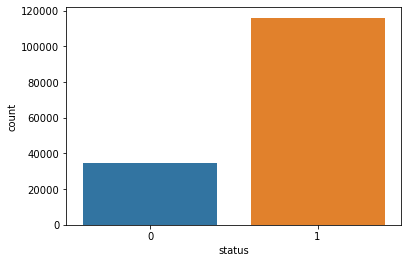

In [534]:
# It's imbalance dataset
sns.countplot(df['status'])
plt.show()

In [535]:
x=df.drop(columns=['status'])
y=df['status']

In [536]:
y.value_counts()

1    116008
0     34432
Name: status, dtype: int64

### Imbalance to Balance Dataset

#### Over Sampling 

In [537]:
from imblearn.over_sampling import SMOTE

In [538]:
smote=SMOTE(sampling_strategy='minority')
x_sm,y_sm=smote.fit_resample(x,y)

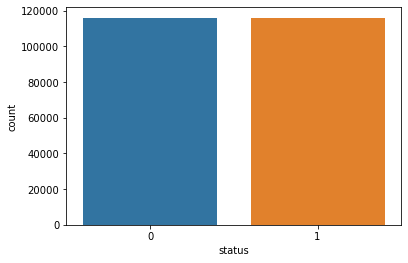

In [539]:
sns.countplot(y_sm)
plt.show()

In [540]:
x_train,x_test,y_train,y_test=train_test_split(x_sm,y_sm,test_size=0.3)

In [541]:
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

In [542]:
# Logistic Regression 69

lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
print('F1 Score :',f1_score(y_test,y_pred))
print('Precision :',precision_score(y_test,y_pred))
print('Recall :',recall_score(y_test,y_pred))

F1 Score : 0.6643304350376095
Precision : 0.6784869268321903
Recall : 0.6507526140411353


In [543]:
# Decision Tree 93

dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)
print('F1 Score :',f1_score(y_test,y_pred))
print('Precision :',precision_score(y_test,y_pred))
print('Recall :',recall_score(y_test,y_pred))

F1 Score : 0.9508239002722453
Precision : 0.9485676711075534
Recall : 0.9530908881994714


In [544]:
# KNN 89

knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
print('F1 Score :',f1_score(y_test,y_pred))
print('Precision :',precision_score(y_test,y_pred))
print('Recall :',recall_score(y_test,y_pred))

F1 Score : 0.9148573611070306
Precision : 0.9361734110997535
Recall : 0.8944904056072619


In [545]:
# Random Forest  95

rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
print('F1 Score :',f1_score(y_test,y_pred))
print('Precision :',precision_score(y_test,y_pred))
print('Recall :',recall_score(y_test,y_pred))

F1 Score : 0.9711224696063993
Precision : 0.976281716309586
Recall : 0.9660174652418706


In [546]:
# Gradient Boost 81

gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)
y_pred=gb.predict(x_test)
print('F1 Score :',f1_score(y_test,y_pred))
print('Precision :',precision_score(y_test,y_pred))
print('Recall :',recall_score(y_test,y_pred))

F1 Score : 0.8352761707394295
Precision : 0.8369383399665455
Recall : 0.8336205906009422


In [547]:
# Adaboost 78

adb=AdaBoostClassifier()
adb.fit(x_train,y_train)
y_pred=adb.predict(x_test)
print('F1 Score :',f1_score(y_test,y_pred))
print('Precision :',precision_score(y_test,y_pred))
print('Recall :',recall_score(y_test,y_pred))

F1 Score : 0.7947887425322105
Precision : 0.7966121259342626
Recall : 0.7929736872342871


In [548]:
# XGBoost 92

xgb=XGBClassifier()
xgb.fit(x_train,y_train)
y_pred=xgb.predict(x_test)
print('F1 Score :',f1_score(y_test,y_pred))
print('Precision :',precision_score(y_test,y_pred))
print('Recall :',recall_score(y_test,y_pred))

F1 Score : 0.9396098218253229
Precision : 0.9377414094017339
Recall : 0.9414856945880731
